In [257]:
from flamingpy.codes.graphs import EGraph
from flamingpy.codes import RHG_graph
import flamingpy.utils.viz as viz
from flamingpy.codes import SurfaceCode
from flamingpy.decoders import decoder as dec
from flamingpy.noise import IidNoise
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Plot settings
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['figure.facecolor'] = 'white'
plt.rc('font', family='Helvetica', size=20)

In [3]:
from flamingpy.utils import graph_states

## Adding a "leaves" attribute to node class

NodeDataView({(0, 0, 0): {'floor': 27}, (1.0, 0.0, 0): {}, (-0.4999999999999998, 0.8660254037844388, 0): {}, (-0.5000000000000004, -0.8660254037844384, 0): {}})

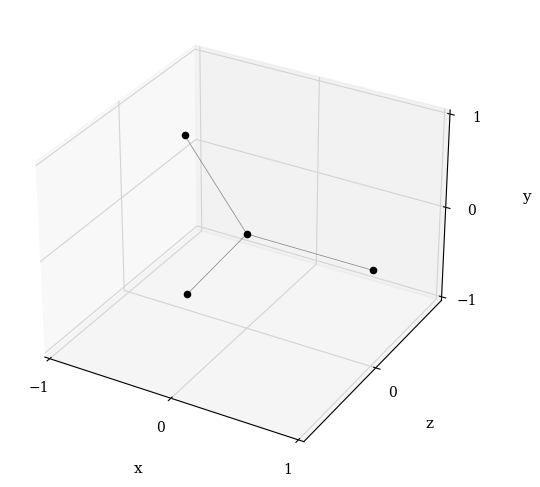

In [12]:
star = graph_states.star_graph(4)
star.draw()
star.nodes[(0,0,0)]['floor'] = 27
star.nodes.data()

## Testing: star graph

(<Figure size 432x288 with 1 Axes>, <Axes3DSubplot:xlabel='x', ylabel='z'>)

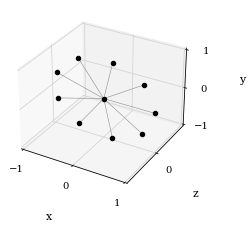

In [3]:
graph = graph_states.star_graph(10)
graph.draw()

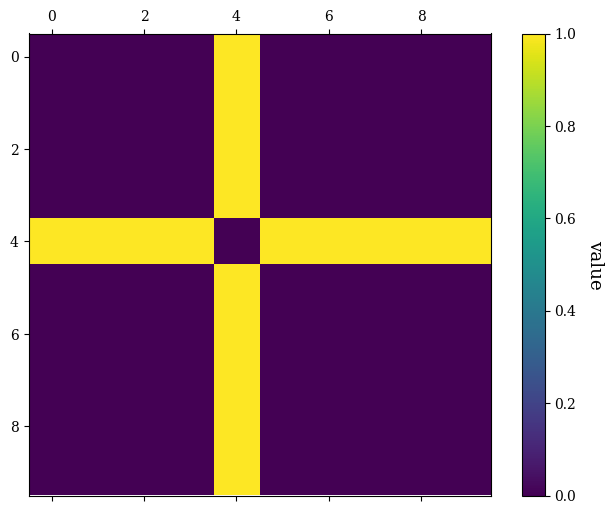

(<Figure size 800x600 with 2 Axes>,
 [<AxesSubplot:>, <AxesSubplot:label='<colorbar>', ylabel='value'>])

In [8]:
graph.draw_adj()

In [9]:
graph.adj_generator()

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=int8)

### Removing a node from a star graph

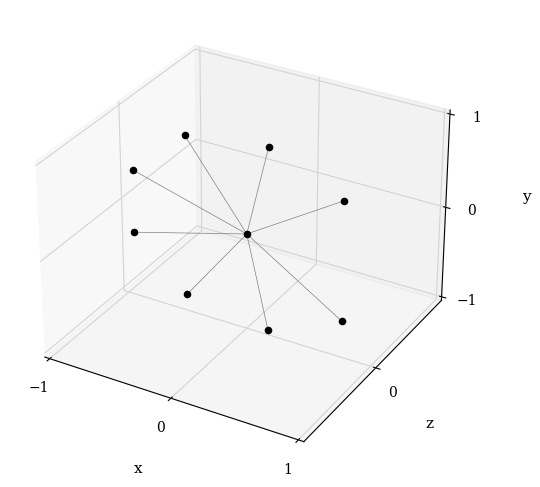

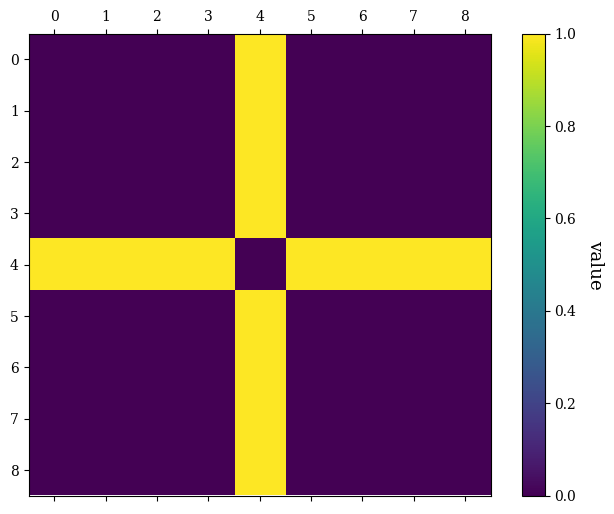

(<Figure size 800x600 with 2 Axes>,
 [<AxesSubplot:>, <AxesSubplot:label='<colorbar>', ylabel='value'>])

In [10]:
star = graph_states.star_graph(10)
nod = list(star.nodes())[1]
star.remove_node(nod)
star.draw()
star.draw_adj()

### Removing an edge from a star graph

(<Figure size 800x600 with 1 Axes>, <Axes3DSubplot:xlabel='x', ylabel='z'>)

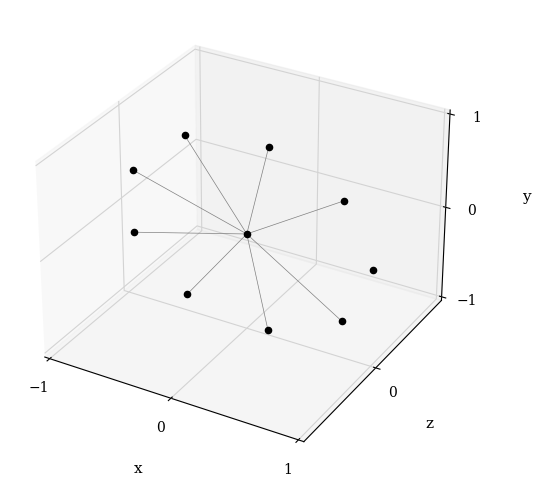

In [11]:
star = graph_states.star_graph(10)
u = list(star.nodes())[0]
v = list(star.nodes())[1] # specify two nodes u and v
star.remove_edge(u,v)
star.draw()

[((0, 0, 0), (1.0, 0.0, 0)), ((0, 0, 0), (-0.4999999999999998, 0.8660254037844388, 0)), ((0, 0, 0), (-0.5000000000000004, -0.8660254037844384, 0))]


(<Figure size 800x600 with 1 Axes>, <Axes3DSubplot:xlabel='x', ylabel='z'>)

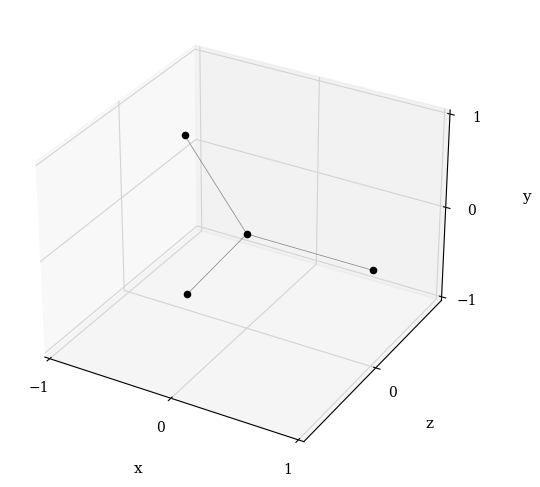

In [12]:
star = graph_states.star_graph(4)
print(star.edges((0,0,0)))
star.draw()

## Testing: RHG Lattice

### Remove node from RHG lattice

[(1, 2, 1), (1, 2, 0), (0, 2, 1), (1, 2, 2), (2, 2, 1), (2, 1, 1), (2, 1, 0), (2, 1, 2), (2, 0, 1), (1, 0, 1), (1, 0, 0), (0, 0, 1), (1, 0, 2), (1, 1, 0), (0, 1, 0), (1, 1, 2), (0, 1, 2), (0, 1, 1)]


(<Figure size 800x600 with 1 Axes>, <Axes3DSubplot:xlabel='x', ylabel='z'>)

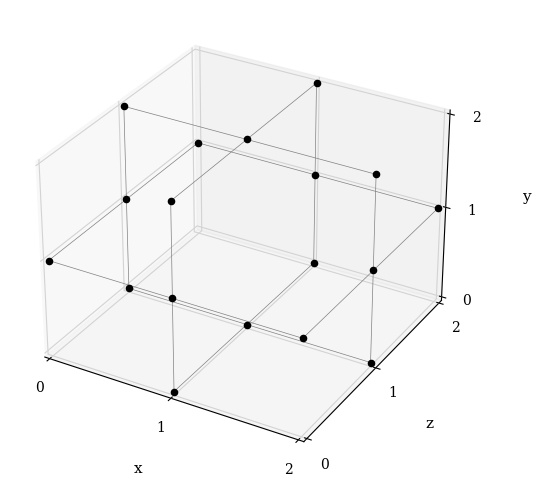

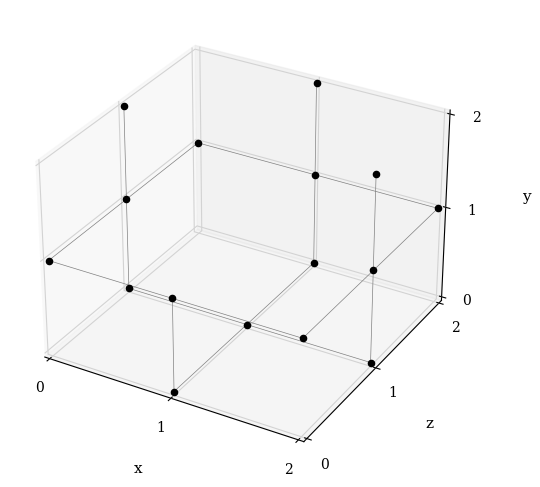

In [348]:
code_distance = 2
RHG = RHG_graph(code_distance)
RHG.draw()
print(list(RHG.nodes()))
RHG.remove_nodes_from(list(RHG.edges())[0])
RHG.draw()

(<Figure size 800x600 with 1 Axes>, <Axes3DSubplot:xlabel='x', ylabel='z'>)

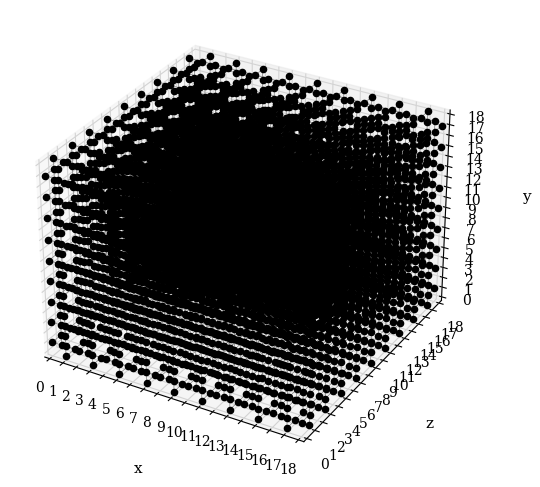

In [292]:
code_distance = 10
RHG = RHG_graph(code_distance)
# print(RHG.degree[(1,2,0)])
# print(list(RHG.nodes()))
# RHG.remove_node((1,2,1))
# print(RHG.degree[(1,2,0)])
RHG.draw()

### Early sim

In this method from Auger (2018) we will perform a Monte-Carlo simulation of the large-depth RHG lattice structure.

Implement the following steps:

- Iterate through the edges of the lattice
    - for each edge, draw from a uniform distribution to determine if the bond fails or succeeds.
        - If the bond fails: delete both nodes associated with the edge
        - If the bond succeeds, move to the next edge
- Compute the hole fraction and compare to percolation threshold

For the nonadaptive method, Auger claimed that after about 6.5% bond failure rate, the hole fraction exceeded the percolation threshold of .249%.

In [181]:
trials = 10
bond_failure_rate = .07
code_distance = 10

hole_fraction = []

for trial in range(trials):
    
    RHG = RHG_graph(code_distance)
    init_edges = list(RHG.edges())
    orig_nodes = len(list(RHG.nodes()))
    
    for edge in init_edges:
        
#         print(edge)
        
        if edge in list(RHG.edges()):
        
#             print('edge present!')
            
            rand = np.random.uniform()

            if rand < bond_failure_rate:  # bond fails; remove both nodes assoc. w edge

#                 print('failure; qubits removed: ',edge)
                RHG.remove_nodes_from(edge)
#                 print('RHG size = ',len(RHG.nodes()),'nodes')

            else:
#                 print('edge successful!')
                continue  # move to next edge
        
        else:
#             print('edge does not exist')
            continue  # move to next edge
            
    
    new_nodes = len(list(RHG.nodes()))
    hole_fraction.append(1 - new_nodes / orig_nodes)
      
print('Average hole fraction: ',np.average(hole_fraction),' +- ',np.std(hole_fraction)/np.sqrt(trials))

Average hole fraction:  0.22444444444444445  +-  0.0024682088475821064


In [186]:
trials = 1
bond_failure_rate = .07
code_distance = 15

hole_fraction = []

for trial in range(trials):
    
    RHG = RHG_graph(code_distance)
    init_edges = list(RHG.edges())
    orig_nodes = len(list(RHG.nodes()))
    
    for edge in init_edges:
        
#         print(edge)
        
        if edge in list(RHG.edges()):
        
#             print('edge present!')
            
            rand = np.random.uniform()

            if rand < bond_failure_rate:  # bond fails; remove both nodes assoc. w edge

#                 print('failure; qubits removed: ',edge)
                RHG.remove_nodes_from(edge)
#                 print('RHG size = ',len(RHG.nodes()),'nodes')

            else:
#                 print('edge successful!')
                continue  # move to next edge
        
        else:
#             print('edge does not exist')
            continue  # move to next edge
            
    
    new_nodes = len(list(RHG.nodes()))
    hole_fraction.append(1 - new_nodes / orig_nodes)
      
print('Average hole fraction: ',np.average(hole_fraction),' +- ',np.std(hole_fraction)/np.sqrt(trials))

Average hole fraction:  0.22725779967159276  +-  0.0


### Naive nonadaptive method

- Iterate over all edges and draw from uniform distribution; record failures
- For each failed edge:
    - Delete both nodes associated with the edge, even if one is already missing
- Record average hole fraction based on number of missing nodes

In [64]:
trials = 10
bond_failure_rate = .069
code_distance = 10

hole_fraction = []

for trial in range(trials):


    RHG = RHG_graph(code_distance)
    init_edges = list(RHG.edges())
    # print(init_edges)
    orig_nodes = len(list(RHG.nodes()))

    failed_edges = []

    for edge in init_edges:
        rand = np.random.uniform()
        if rand < bond_failure_rate:
            failed_edges.append(edge)

    for edge in failed_edges:
        RHG.remove_nodes_from(edge)

    new_nodes = len(list(RHG.nodes()))
    hole_fraction.append(1 - new_nodes / orig_nodes)
      
print('Average hole fraction: ',np.average(hole_fraction),' +- ',np.std(hole_fraction)/np.sqrt(trials))

Average hole fraction:  0.23649122807017547  +-  0.002518741805079698


| Trials | Code distance | Avg. hole fraction (BFR = .069)|
| :---: | :---: | :---: |
| 1 | 100 | .248 |
| 10 | 50 | .2465 +- .0001 |
| 1000| 10|.2373 +- .0003 |

Consider the following scenario.  More than one of the four bonds from one central node fail.  After the first failure, all four bonds should technically be erased, which means the three remaining neighboring qubits should only need to make three bonds to be kept (ie. not lost).  However, if there is another bond failure, one of the other qubits will also be erased.

This is equivalent to saying each qubit needs four successful bonds in order to not be erased.  We see agreement with Auger's 2018 paper (approx. 7% bond failure gives the percolation threshold in this model).

### Smarter nonadaptive method

- Iterate over all edges and draw from uniform distribution; record failures
- For each failed edge:
    - If BOTH of the nodes still exist, delete both and move to the next failure
    - Otherwise, simply skip and move to the next failure
    

If a given central node has a failure, both the central and the corresponding leaf will be deleted.  Once the central node is deleted, even if other bonds within the star happened to fail, the remaining leaf nodes will not be deleted.

In [88]:
trials = 1000
bond_failure_rate = .078
code_distance = 10

hole_fraction = []

for trial in range(trials):

    RHG = RHG_graph(code_distance)
    init_edges = list(RHG.edges())
    # print(init_edges)
    orig_nodes = len(list(RHG.nodes()))

    failed_edges = []

    for edge in init_edges:
        rand = np.random.uniform()
        if rand < bond_failure_rate:
            failed_edges.append(edge)

    for edge in failed_edges:
        if edge[0] in RHG.nodes() and edge[1] in RHG.nodes():
            RHG.remove_node(edge[0])
            RHG.remove_node(edge[1])
        else:
            continue


    new_nodes = len(list(RHG.nodes()))
    hole_fraction.append(1 - new_nodes / orig_nodes)
      
print('Average hole fraction: ',np.average(hole_fraction),' +- ',np.std(hole_fraction)/np.sqrt(trials))

Average hole fraction:  0.2416358674463938  +-  0.00024313810821610432


| Trials | Code distance | Avg. hole fraction (BFR = .078)|
| :---: | :---: | :---: |
| 1 | 100 | .252 |
| 10 | 50 | .251 +- .0002 |
| 1000| 10|.242 +- .0002 |

### Naive Adaptive bond failure simulation

- Iterate over all edges and draw from uniform distribution; record failures
- For each failed edge:
    - Randomly choose one of the two nodes involved
    - If the randomly chosen node exists, remove it; otherwise continue to the next failed edge
    

Analysis:

To see why this method is naive consider the following circumstance:  Suppose one more than one edge out of four fails.  Then suppose that the central qubit is chosen for Z measurement.  The remaining three bonds should be deleted, and barring any other failures outside of these four, the three other qubits should remain.  However, if one of the other three bonds had also happened to fail, this bond remains in the failure list.  Then we can imagine an instance where one of the other three qubits is incorrectly marked for deletion.

In [298]:
trials = 1000
bond_failure_rate = .138
code_distance = 10

hole_fraction = []

for trial in range(trials):

    RHG = RHG_graph(code_distance)
    init_edges = list(RHG.edges())
    orig_nodes = len(list(RHG.nodes()))

    failed_edges = []

    for edge in init_edges:
        rand = np.random.uniform()
        if rand < bond_failure_rate:
            failed_edges.append(edge)

    for edge in failed_edges:
        try:
            ind = np.random.choice((0,1))
            RHG.remove_node(edge[ind])
        except:
            continue


    new_nodes = len(list(RHG.nodes()))
    hole_fraction.append(1 - new_nodes / orig_nodes)
      
print('Average hole fraction: ',np.average(hole_fraction),' +- ',np.std(hole_fraction)/np.sqrt(trials))

Average hole fraction:  0.23749941520467838  +-  0.00017595501382159387


| Trials | Code distance | Avg. hole fraction (BFR = .138)|
| :---: | :---: | :---: |
| 1 | 100 | .247 |
| 10 | 50 | .2465 +- .0001 |
| 1000| 10|.2375 +- .0002 |

Result:

It makes sense that the 13.8% BFR results in an overall hole fraction that approaches threshold as the code distance increases.  This is because .138 is derived assuming every node has 4 nearest neighbors, which is asymptotically correct as the code distance grows.

### Smart Adaptive bond failure simulation

- Iterate over all edges and draw from uniform distribution; record failures
- For each failed edge:
    - Check that both nodes exist; otherwise move to next failure immediately
    - If yes, remove one node at random and move to next failure
    
    
This method ensures that a given node is only removed due to a failure if the node at the other end of the failed bond has not already been removed.

Outcome: this code performs slightly better than the Auger paper; they claim that the percolation threshold is saturated when BFR is approx 14.5%.  

In [98]:
trials = 1000
bond_failure_rate = .155
code_distance = 10

hole_fraction = []

for trial in range(trials):

    RHG = RHG_graph(code_distance)
    init_edges = list(RHG.edges())
    orig_nodes = len(list(RHG.nodes()))

    failed_edges = []

    for edge in init_edges:
        rand = np.random.uniform()
        if rand < bond_failure_rate:
            failed_edges.append(edge)

    for edge in failed_edges:
        if edge[0] in RHG.nodes() and edge[1] in RHG.nodes():
            ind = np.random.choice((0,1))
            RHG.remove_node(edge[ind])
        else:
            continue

    new_nodes = len(list(RHG.nodes()))
    hole_fraction.append(1 - new_nodes / orig_nodes)
      
print('Average hole fraction: ',np.average(hole_fraction),' +- ',np.std(hole_fraction)/np.sqrt(trials))

Average hole fraction:  0.24076491228070176  +-  0.00016656034637593922


| Trials | Code distance | Avg. hole fraction (BFR = .147)|
| :---: | :---: | :---: |
| 1 | 100 | .240 |
| 10 | 50 | .2389 +- .0001 |
| 1000| 10|.2305 +- .0002 |

| Trials | Code distance | Avg. hole fraction (BFR = .155)|
| :---: | :---: | :---: |
| 1 | 100 | .251 |
|10 | 50 | .249 +- .0001 |
|1000 | 10 | .241 +- .0001 |

## Error Correction

Success: True


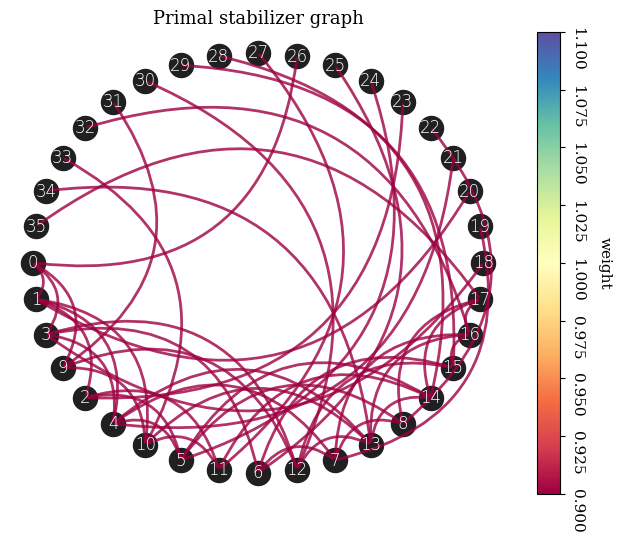

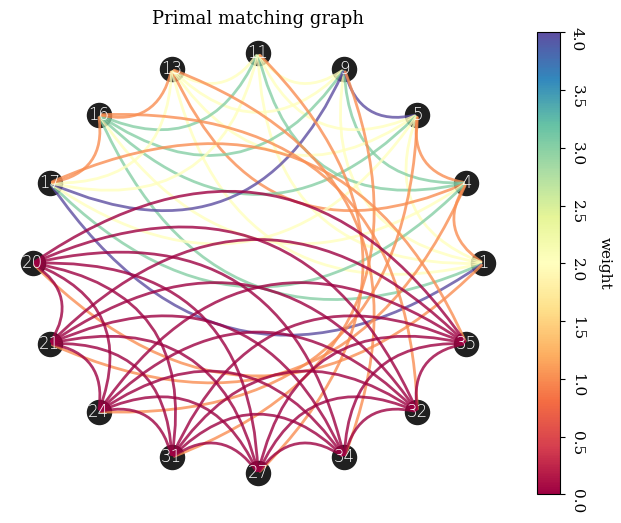

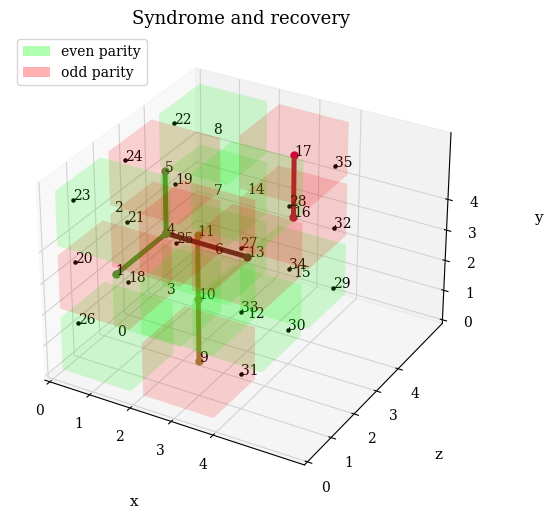

In [342]:
# QEC code parameters
distance = 3
# Boundaries ("open", "toric" or "periodic")
boundaries = "open"
# Error complex ("primal" or "dual")
ec = "primal"

# Code and code lattice (cluster state)
RHG_code = SurfaceCode(distance=distance, ec=ec, boundaries=boundaries)
# RHG_code.draw()

p_Z = 0.1
IidNoise(RHG_code, p_Z).apply_noise()

decoder = "MWPM"

dw = {
    "show_nodes": False,
    "color_nodes": "k",
    "show_recovery": True,
    "label_stabilizers": True,
    "label_boundary": True,
    "label_edges": False,
    "label": None,
    "legend": True,
    "show_title": True,
    "show_axes": True,
}

c = dec.correct(
    code=RHG_code,
    decoder=decoder,
    draw=True,
    drawing_opts=dw,
)
print(f"Success: {c}")

In [346]:
bond_failure_rate = .01

# QEC code parameters
distance = 3
# Boundaries ("open", "toric" or "periodic")
boundaries = "open"
# Error complex ("primal" or "dual")
ec = "primal"

# Code and code lattice (cluster state)
RHG = SurfaceCode(distance=distance, ec=ec, boundaries=boundaries)
# RHG_code.draw()

init_edges = list(RHG.edges())
orig_nodes = len(list(RHG.nodes()))

failed_edges = []

for edge in init_edges:
    rand = np.random.uniform()
    if rand < bond_failure_rate:
        failed_edges.append(edge)

for edge in failed_edges:
    if edge[0] in RHG.nodes() and edge[1] in RHG.nodes():
        ind = np.random.choice((0,1))
        RHG.remove_node(edge[ind])
    else:
        continue

decoder = "MWPM"

dw = {
    "show_nodes": False,
    "color_nodes": "k",
    "show_recovery": True,
    "label_stabilizers": True,
    "label_boundary": True,
    "label_edges": False,
    "label": None,
    "legend": True,
    "show_title": True,
    "show_axes": True,
}

c = dec.correct(
    code=RHG,
    decoder=decoder,
    draw=True,
    drawing_opts=dw,
)
print(f"Success: {c}")

AttributeError: 'SurfaceCode' object has no attribute 'edges'

## Leaf redistribution

Here we want to evaluate whether redistributing qubits outside of their "initial" four primary directions has an impact.

In order to benchmark the effect of the redistribution, we want to compare the resulting loss rates to when we were simply probabilistically choosing whether a given bond failed or not.  When there are five total qubits, each primary direction only has one chance for success.  This means that when a given edge fails, the qubit will be marked for deletion in the naive non-adaptive approach because it cannot possibly form four successful bonds.

In [278]:
def redistribution(trialnum, ghz_size, coop, distance):

    trials = trialnum
    P_cz = 6/np.sqrt(coop)
    code_distance = distance
    size = ghz_size
    hole_fraction = []
    edge_fail_fraction = []

    for trial in range(trials):

        RHG = RHG_graph(code_distance)
        init_edges = list(RHG.edges())
        orig_nodes = len(list(RHG.nodes()))

        for node in RHG.nodes():
            RHG.nodes[node]['qubits'] = size - 1

        failed_edges = []

        for edge in init_edges:
    #         print('new edge')
            success = False

            while RHG.nodes[edge[0]]['qubits'] * RHG.nodes[edge[1]]['qubits'] != 0:  # attempt the edge
                rand = np.random.uniform()
                if rand > P_cz:  # bond succeeds
                    success = True
                RHG.nodes[edge[0]]['qubits'] -= 1
                RHG.nodes[edge[1]]['qubits'] -= 1
    #             print('node 1 qubits:',RHG.nodes[edge[0]]['qubits'])
    #             print('node 2 qubits:',RHG.nodes[edge[1]]['qubits'])
    #             print('success?',success)
                if success:
                    break

            if not success:  # one of the nodes reached 0 qubits; while loop terminated
                failed_edges.append(edge)

        for edge in failed_edges:
            RHG.remove_nodes_from(edge)

        new_nodes = len(list(RHG.nodes()))
        hole_fraction.append(1 - new_nodes / orig_nodes)
        edge_fail_fraction.append(len(failed_edges) / len(init_edges))
        
#     print('Average hole fraction: ',np.average(hole_fraction),' +- ',np.std(hole_fraction)/np.sqrt(trials))
#     print('Average edge failure fraction: ',np.average(edge_fail_fraction),' +- ',np.std(edge_fail_fraction)/np.sqrt(trials))
    
    return (size,coop,np.average(edge_fail_fraction))

| Trials | Code distance |Size|Gate failure rate| Edge failure rate| Hole fraction|
| :---: | :---: | :---: | :---: | :---: | :---: |
| 10 | 10 |5| .053 | .069 +- .001 | .243 +- .003|

Benchmark: when the gate failure rate produces an overall edge failure rate equal to the threshold from Auger (2018) for the non-adaptive naive approach (6.9%), we find the hole fraction matches the bond percolation threshold.

In [276]:
redistribution(5,13,300,10)

Average hole fraction:  0.00877192982456143  +-  0.0011825146891308433
Average edge failure fraction:  0.0024897119341563785  +-  0.00033229019322117447


(13, 300, 0.0024897119341563785)


KeyboardInterrupt



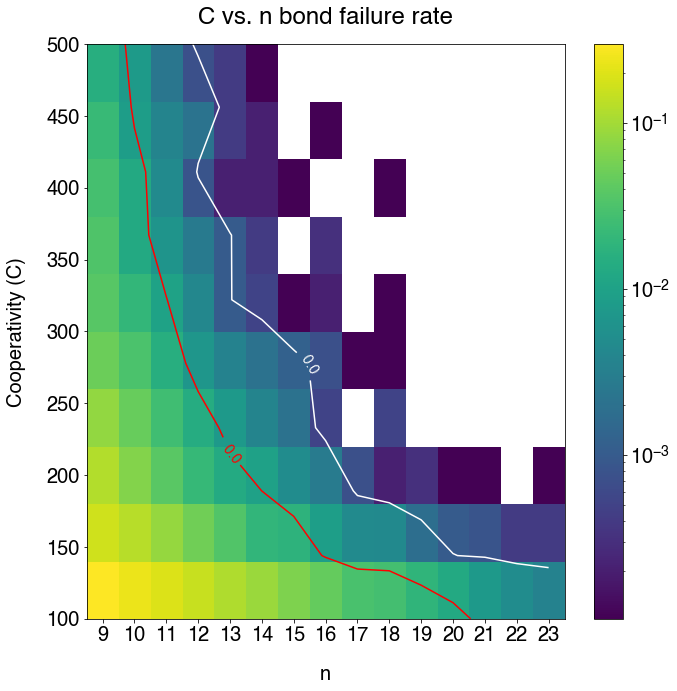

In [280]:
C = np.round(np.linspace(100,500,10))
n = np.arange(9,24,1)
X, Y = np.meshgrid(n, C)

results = np.zeros([len(C),len(n)])

for i in range(len(C)):
    for j in range(len(n)):
        
        output = redistribution(1, n[j], C[i],10)
        
        results[i][j] = output[2]

fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(results, interpolation='none', norm=LogNorm(), 
          extent=[min(n)-.5,max(n)+.5,min(C),max(C)], aspect='auto', origin='lower')
ax.set_xticks(n)
levels = [.001,.01]
CS = ax.contour(X, Y, results, levels, colors=['white','red'])
ax.clabel(CS, levels, inline = 1, fmt ='% 1.1f',
          fontsize = 14)
fig.colorbar(im, orientation='vertical')

plt.title('C vs. n bond failure rate',pad=20)
plt.xlabel('n',labelpad=20)
plt.ylabel('Cooperativity (C)',labelpad=20)
plt.tight_layout()
plt.savefig('C vs n bond failure rate2',dpi=400)
plt.show()